## Compare Primary Productivity from difference methods and the distribution of export efficiencies

In [1]:
black=(0,0,0)
lightblue= (112/255.0,160/255.0,205/255.0)
orange=(196/255.0,121/255.0,0)
grey=(178/255.0,178/255.0,178/255.0)
darkblue=(0,52/255.0,102/255.0)
darkgreen=(0,79/255.,0)

black_shade = (128/255.0,128/255.0, 128/255.0)
lightblue_shade = (91/255.0, 174/255.0,178/255.0)
orange_shade = (204/255.0,174/255.0,113/255.0)
grey_shade = (191/255.0,191/255.0,191/255.0)
darkblue_shade = (67/255.0,147/255.0,195/255.0)
darkgreen_shade =(223/255.0, 237/255.0,195/255.0)

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load PP and export data


## Export
sg643 = xr.open_dataset('../results/data/export643.nc')
sg640= xr.open_dataset('../results/data/export640.nc')

## Primary Productivity 
npp643=xr.open_dataset('../results/data/npp_643.nc').to_pandas()

In [4]:
export643 = pd.DataFrame({'POC_170':sg643.large_particle_flux[17,:],
                     'POC_100':sg643.large_particle_flux[10,:],
                          'time':sg643.index
                      })
export643=export643.set_index('time')
export643['days_since'] = (((export643.index.dayofyear+ 180) %365)-180)


/var/folders/ss/4xjyrghn4k50f2gxbdkl6d0r0000gp/T/ipykernel_37189/3279002650.py:73: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('../results/figures/S7_PPmethods_comparison.png',dpi=150,bbox_inches='tight')
/opt/anaconda3/envs/mizExport_test/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


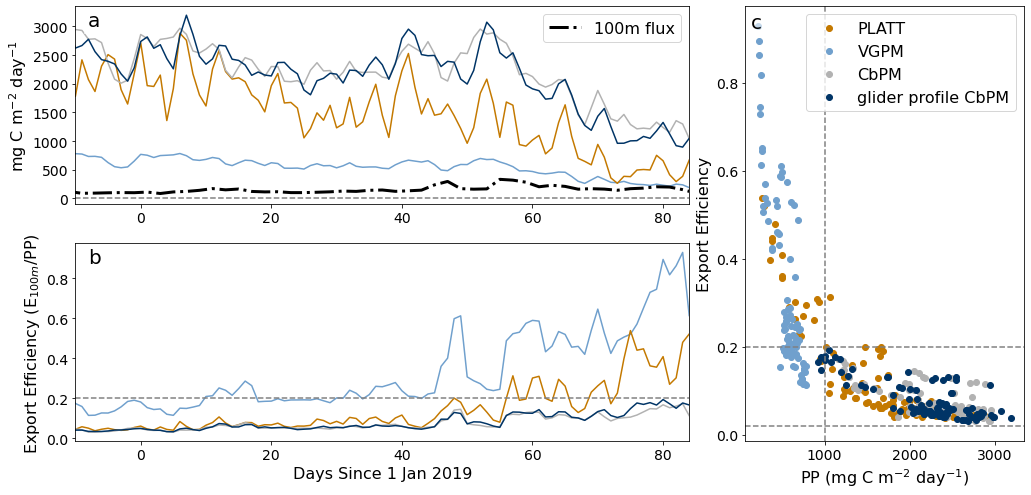

In [6]:

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rcParams.update({'font.size': 16})

import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=[17,8],constrained_layout=True)
gs = gridspec.GridSpec(2,3)

ax1 = fig.add_subplot(gs[0,:2])
ax2 = fig.add_subplot(gs[1,:2])
ax3 = fig.add_subplot(gs[:,2])


ax1.plot(npp643.days_since_1Jan,npp643.vgpm_eppley.rolling(2).mean(),c=lightblue)
ax1.plot(npp643.days_since_1Jan,npp643.platt.interpolate().rolling(2,win_type='boxcar').mean().values,c=orange)
ax1.plot(npp643.days_since_1Jan,npp643.cbpm_standard.rolling(2).mean(),c=grey)
ax1.plot(npp643.days_since_1Jan,npp643.cbpm_int_glider.rolling(2).mean().values,c=darkblue)


ax1.plot(export643.days_since[:],export643.POC_100,label='100m flux',lw=3,linestyle='dashdot',c=black)
ax1.legend(loc='upper right')

ax1.set_ylabel('mg C m$^{-2}$ day$^{-1}$')
# ax1.set_title('Daily Primary Productivity')


ax1.axhline(0,c='grey',ls='--')

ax1.set_xlim(-10,84)

ax2.plot(npp643.days_since_1Jan[2:].values,np.repeat(export643.POC_100,2)[2:-3].values/npp643.vgpm_eppley.rolling(2).mean()[:-2].values,c=lightblue,label=' Eppley VGPM')
ax2.plot(npp643.days_since_1Jan[2:].values,np.repeat(export643.POC_100,2)[2:-3].values/npp643.platt.interpolate().rolling(2,win_type='boxcar').mean().values[:-2],c=orange,label='Platt')
ax2.plot(npp643.days_since_1Jan[2:].values,np.repeat(export643.POC_100,2)[2:-3].values/npp643.cbpm_standard.rolling(2).mean()[:-2].values,c=grey,label='CbPM')
ax2.plot(npp643.days_since_1Jan[2:].values,np.repeat(export643.POC_100,2)[2:-3].values/npp643.cbpm_int_glider.rolling(2).mean().values[:-2],c=darkblue,label='depth integrated CbPM')
# ax2.legend(loc='upper center')

ax2.set_xlim(-10,84)

ax2.set_ylabel('Export Efficiency (E$_{100m}$/PP)')

ax2.set_xlabel('Days Since 1 Jan 2019')

ax2.axhline(0.2,c='grey',ls='--')

#######

ee = pd.DataFrame({'vgpm':np.repeat(export643.POC_100,2)[2:-3].values/npp643.vgpm_eppley.rolling(2).mean()[:-2].values,
                  'platt':np.repeat(export643.POC_100,2)[2:-3].values/npp643.platt.interpolate().rolling(2,win_type='boxcar').mean().values[:-2],
                  'cbpm':np.repeat(export643.POC_100,2)[2:-3].values/npp643.cbpm_standard.rolling(2).mean()[:-2].values,
                  'cbpm_int':np.repeat(export643.POC_100,2)[2:-3].values/npp643.cbpm_int_glider.rolling(2).mean().values[:-2]})

ax3.scatter(npp643.platt.interpolate().rolling(2,win_type='boxcar').mean().values[:-2],ee.platt,label='PLATT',color=orange)
ax3.scatter(npp643.vgpm_eppley.rolling(2).mean()[:-2],ee.vgpm,label='VGPM',color=lightblue)
ax3.scatter(npp643.cbpm_standard.rolling(2).mean()[:-2],ee.cbpm,label='CbPM',color=grey)
ax3.scatter(npp643.cbpm_int_glider.rolling(2).mean().values[:-2],ee.cbpm_int,label='glider profile CbPM',color=darkblue)

ax3.legend()
ax3.axhline(0.2,c='grey',ls='--')
ax3.axhline(0.02,c='grey',ls='--')

ax3.axvline(1000,c='grey',ls='--')

ax3.set_ylabel('Export Efficiency')
ax3.set_xlabel('PP (mg C m$^{-2}$ day$^{-1}$)')

ax1.text(0.02,0.9,'a',transform=ax1.transAxes,fontsize=20,bbox=dict(facecolor='white', edgecolor='None',alpha=0.6))
ax2.text(0.02,0.9,'b',transform=ax2.transAxes,fontsize=20,bbox=dict(facecolor='white', edgecolor='None',alpha=0.6))
ax3.text(0.02,0.95,'c',transform=ax3.transAxes,fontsize=20,bbox=dict(facecolor='white', edgecolor='None',alpha=0.6))


plt.savefig('../results/figures/S7_PPmethods_comparison.png',dpi=150,bbox_inches='tight')